# 量子ビット状態を表現する

このコースをさらに進めるには、量子ビットの状態を書き留める方法が必要です。第2章の終わりまでに、ベクトルと行列のみを使用して、任意の量子ビットのセットと任意の量子演算の状態を書き留めることができることがわかります。 **続行する前に**、複素数に慣れる必要があります。線形代数の知識は役立ちますが、複素数の重要な概念が点在していることに注意してください。さらに詳しい説明や復習が必要な場合は、ここで数学の前提条件を確認できます。[こちら](../ch-prerequisites/linear_algebra.html)

## 目次

1. [古典ビット vs 量子ビット](#cvsq)    
    1.1 [状態ベクトル](#statevectors)      
    1.2 [量子ビット表記](#notation)    
    1.3 [Qiskitを使って量子ビットを探索する](#exploring-qubits)    
2. [測定のルール](#rules-measurement)    
    2.1 [非常に重要なルール](#important-rule)    
    2.2 [測定のルールの意味](#implications)
3. [ブロッホ球](#bloch-sphere)    
    3.1 [制限された量子ビット状態の説明](#bloch-sphere-1)     
    3.2 [量子ビットの状態を視覚的に表現する](#bloch-sphere-2)     


## 1. 古典ビット vs 量子ビット <a id="cvsq"></a>

### 1.1 状態ベクトル<a id="statevectors"></a>

量子物理学では、_状態ベクトル_ を使用してシステムの状態を記述します。これは、一般的に数値のみを使用する古典的な物理学とは異なります。たとえば、道路に沿った車の位置を記述したい場合、これは古典的なシステムであるため、数$x$を使用できます。

![tracking a car with scalars](images/car_track_1.jpg)

$$ x=4 $$

代わりに、_状態ベクトル_ と呼ばれるベクトルで数値のコレクションを使用することもできます。状態ベクトルの各要素には、特定の場所で自動車を見つける確率が含まれています。

![tracking a car with vectors](images/car_track_2.jpg)

$$
|x\rangle = \begin{bmatrix} 0\\ \vdots \\ 0 \\ 1 \\ 0 \\ \vdots \\ 0 \end{bmatrix} 
            \begin{matrix} \\  \\  \\ \leftarrow \\  \\  \\  \\ \end{matrix}
             \begin{matrix} \\  \\ \text{車が} \\ \text{位置4にある} \\ \text{確率} \\  \\  \\ \end{matrix}   
$$

このことは位置に限定されず、車が持つ可能性のあるすべての速度と、車が持つ可能性のあるすべての色の状態ベクトルを保持することもできます。ただ（上記の自動車の例のような）古典的なシステムでは、実際に1つの数値しか必要としないときに巨大なベクトルを維持する必要があるため、これは愚かなことです。しかし、この章で見るように、状態ベクトルは、量子コンピュータを含む量子システムを追跡するための非常に良い方法です。

### 1.2 量子ビット表記 <a id="notation"></a>


古典的なビット（`c`）の状態を書き留めたいとしましょう。数字の` 0`と `1`を使います。

    c = 0

古典的なビットは常に明確な状態を持っているので、この表記は問題ありません。ただし、量子ビットには、さまざまな状態が測定される可能性があります。 量子ビットが測定される各状態には、 _振幅_ （複素数）があり、この複素数をみていく必要があります。量子ビットは2つのエネルギーレベルを持つシステムであるため、測定する* と、次の2つの状態のいずれかが検出されます。

$$ |0\rangle \quad \&  \quad |1\rangle $$

<div style="font-size: .75em"> *これはある種類の測定にのみ当てはまりますが、今は心配する必要はありません。これについては、この後のセクションで説明します。</div>

つまり、2つの複素数をみていく必要があります。 ベクトルはこれを表現する素晴らしい方法です。

$$ |q_0\rangle = \begin{bmatrix} \tfrac{1}{\sqrt{2}} \\ \tfrac{i}{\sqrt{2}} \end{bmatrix} $$

ここでは、ベクトル($|q_0\rangle$)の要素を使用して、状態$|0\rangle$および$|1\rangle$の複素振幅の「リスト」を格納します。この場合、$|0\rangle$の振幅は$\tfrac{1}{\sqrt{2}}$で、$|1\rangle$の振幅は$\tfrac{i}{\sqrt{2}}$です。$|$ と $\rangle$ の記号で囲んで列ベクトルを表すことに注意してください。状態の振幅は、その状態で量子ビットを測定する確率に関連しています。量子ビットの状態が$|0\rangle$である場合、$|0\rangle$の振幅は1で、$|1\rangle$の振幅は0です。したがって、次のように記述できます。

$$ |0\rangle = \begin{bmatrix} 1 \\ 0 \end{bmatrix} $$

そして同様に

$$ |1\rangle = \begin{bmatrix} 0 \\ 1 \end{bmatrix} $$

$|0\rangle$と$|1\rangle$は正規直交基底を形成し、$|0\rangle$と$|1\rangle$の組み合わせで任意の2次元ベクトルを表すことができることに注意してください。このことを知っておくと、量子ビットの状態を別の形で書くことができます。

$$ |q_0\rangle = \tfrac{1}{\sqrt{2}}|0\rangle + \tfrac{i}{\sqrt{2}}|1\rangle $$


<p>
 <details>
  <summary>備忘：行列の加算とスカラーによる乗算（ここをクリックして展開してください）</summary>
  <p>2つのベクトルを加算するには、それらの要素を一緒に加算します。
    $$|a\rangle = \begin{bmatrix}a_0 \\ a_1 \\ \vdots \\ a_n \end{bmatrix}, \quad
    |b\rangle = \begin{bmatrix}b_0 \\ b_1 \\ \vdots \\ b_n \end{bmatrix}$$
    $$|a\rangle + |b\rangle = \begin{bmatrix}a_0 + b_0 \\ a_1 + b_1 \\ \vdots \\ a_n + b_n \end{bmatrix} $$
    </p>
  <p>そして、ベクトルにスカラーを掛けるには、各要素にスカラーを掛けます。
    $$x|a\rangle = \begin{bmatrix}x \times a_0 \\ x \times  a_1 \\ \vdots \\ x \times  a_n \end{bmatrix}$$
    </p>
  <p>これらの2つのルールは、ベクトル$|q_0\rangle$を書き換えるために使用されます。（上記を参照）
      $$
      \begin{aligned} 
      |q_0\rangle & = \tfrac{1}{\sqrt{2}}|0\rangle + \tfrac{i}{\sqrt{2}}|1\rangle \\
                  & = \tfrac{1}{\sqrt{2}}\begin{bmatrix}1\\0\end{bmatrix} + \tfrac{i}{\sqrt{2}}\begin{bmatrix}0\\1\end{bmatrix}\\
                  & = \begin{bmatrix}\tfrac{1}{\sqrt{2}}\\0\end{bmatrix} + \begin{bmatrix}0\\\tfrac{i}{\sqrt{2}}\end{bmatrix}\\
                  & = \begin{bmatrix}\tfrac{1}{\sqrt{2}} \\ \tfrac{i}{\sqrt{2}} \end{bmatrix}\\
      \end{aligned}
      $$
 </details>
</p>
<p>
 <details>
  <summary>備忘：正規直交基底（ここをクリックして展開してください）</summary>
  <p>前に、2つのベクトル$|0\rangle$と$|1\rangle$は直交であると述べました。つまり、これらは両方とも<i>直交</i>で<i>正規化</i>されています。 直交とは、ベクトルが直角であることを意味します。
  </p><p><img src="images/basis.svg"></p>
  <p>正規化とは、その大きさ（矢印の長さ）が1に等しいことを意味します。2つのベクトル$|0\rangle$と$|1\rangle$は<i>線形独立</i>です。つまり、$|0\rangle$を$|1\rangle$で表すことはできず、逆も同様です。ただし、ベクトル$|0\rangle$と$|1\rangle$の両方、およびスカラーによる加算と乗算の規則を使用すると、2次元空間で可能なすべてのベクトルを記述できます。
    </p><p><img src="images/basis2.svg"></p>
  <p>ベクトル$|0\rangle$と$|1\rangle$は線形独立であり、ベクトルの加算とスカラー倍算を使用して2次元空間で任意のベクトルを記述するのに使用できるため、ベクトル$|0\rangle$と$|1\rangle$は<i>基底</i>を形成します。 この場合、それらは直交であり、正規化されているため、これを<i>正規直交基底</i>と呼びます。</p>
 </details>
</p>

このベクトル$|q_0\rangle$は、量子ビットの _状態ベクトル_ と呼ばれます。これは、この量子ビットについておそらく知ることができるすべてのことを示しています。$|0\rangle$と$|1\rangle$の振幅がゼロではないため、量子ビットは$|0\rangle$と$|1\rangle$の状態の _重ね合わせ_ にあると言われます。

### 1.3 Qiskitを使って量子ビットを探索する<a id="exploring-qubits"></a>

まず、必要なすべてのツールをインポートする必要があります。

In [1]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector
from math import sqrt, pi

さらに、画像出力を改善するために設定を変更します。（IPython環境で実行していない場合は、この行を無視してください。）

In [2]:
%config InlineBackend.figure_format = 'svg' # 画像を美しく見せます。

Qiskitでは、`QuantumCircuit`オブジェクトを使用して回路を格納します。これは基本的に、回路内の量子ゲートとそれらが適用される量子ビットのリストです。

In [3]:
qc = QuantumCircuit(1) # 1量子ビットで量子回路を作成します。

私たちの量子回路では、量子ビットは常に$|0\rangle$の状態で始まります。`initialize()`メソッドを使用して、これを任意の状態に変換できます。`initialize()`にリストの形式で必要なベクトルを与え、この状態でどの量子ビットを初期化したいかを伝えます。

In [4]:
initial_state = [0,1]   # 初期状態を|1>と定義します。
qc.initialize(initial_state, 0) # 初期化操作を0番目の量子ビットに適用します。
qc.draw()              # 回路を見てみましょう。

┌─────────────────┐
q_0: ┤ Initialize(0,1) ├
     └─────────────────┘

次に、Qiskitのシミュレーターの1つを使用して、量子ビットの結果の状態を表示できます。 最初に、statevectorシミュレーターを使用しますが、さまざまなシミュレーターとその使用法については後で説明します。

In [5]:
backend = Aer.get_backend('statevector_simulator') # Qiskitに回路のシミュレーション方法を伝えます。

回路から結果を取得するには、`execute`を使用して回路を実行し、circuitとbackendを引数として指定します。 次に、`.result()`を使用して、この結果を取得します。

In [6]:
result = execute(qc,backend).result() # シミュレーションを行い、結果を返します。

`result`から、`.get_statevector()`を使用して最終的な状態ベクトルを取得できます。

In [7]:
out_state = result.get_statevector()
print(out_state) # 出力状態ベクトルを表示します。

[0.+0.j 1.+0.j]


**注意** Pythonは`j`を使用して複素数の$i$を表します。2つの複素数の要素を持つベクトルが表示されます。`0.+0.j` = 0と `1.+0.j` = 1です。

実際の量子コンピューターと同じように量子ビットを測定して、結果を見てみましょう。

In [8]:
qc.measure_all()
qc.draw()

┌─────────────────┐ ░ ┌─┐
   q_0: ┤ Initialize(0,1) ├─░─┤M├
        └─────────────────┘ ░ └╥┘
meas_0: ═══════════════════════╩═

今回は、statevectorの代わりに、`.get_counts()`を使用して `0`と`1`の結果のカウントを取得します。

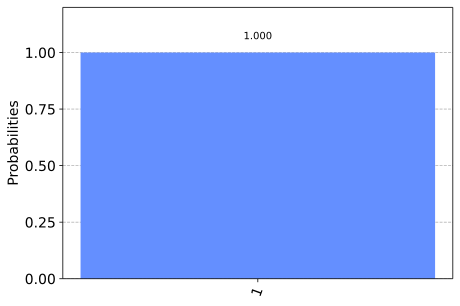

In [9]:
result = execute(qc,backend).result()
counts = result.get_counts()
plot_histogram(counts)

（当然のことながら）$|1\rangle$を測定する可能性が100％あることがわかります。 では、代わりに量子ビットを重ね合わせて、何が起こるか見てみましょう。 このセクションの前半の状態$|q_0\rangle$を使用します。

$$ |q_0\rangle = \tfrac{1}{\sqrt{2}}|0\rangle + \tfrac{i}{\sqrt{2}}|1\rangle $$

これらの振幅をpythonリストに追加する必要があります。 複素振幅を追加するには、 `complex`を使用して、実数部と虚数部を引数として指定します。

In [10]:
initial_state = [1/sqrt(2), complex(0,1/sqrt(2))] # 状態|q>を定義します。

次に、以前と同じように量子ビットを初期化するための手順を繰り返します。

In [11]:
qc = QuantumCircuit(1) # qcを再定義する必要があります。
qc.initialize(initial_state, 0) # `initial_state`状態の0番目の量子ビットを初期化します。
state = execute(qc,backend).result().get_statevector() # 回路を実行します。
print(state)           # 結果を表示します。

[0.70710678+0.j         0.        +0.70710678j]


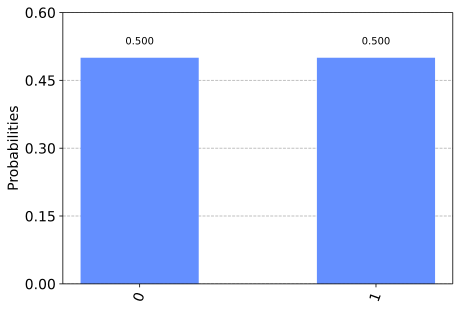

In [12]:
results = execute(qc,backend).result().get_counts()
plot_histogram(results)

$|0\rangle$または$|1\rangle$を測定する確率が等しいことがわかります。 これを説明するには、測定について話す必要があります。

## 2. 測定のルール <a id="rules-measurement"></a>
### 2.1 非常に重要なルール <a id="important-rule"></a>

測定には簡単なルールがあります。 状態$|\psi \rangle$を状態$|x\rangle$で測定する確率を見つけるには、

$$p(|x\rangle) = | \langle x | \psi \rangle|^2$$

記号$\langle$および$|$は、$\langle x |$が行ベクトルであることを示します。 量子力学では、列ベクトルを _ケット_ 、行ベクトルを _ブラ_ と呼びます。これらを合わせて _ブラケット_ 表記を構成します。 すべてのケット$|a\rangle$には対応するブラ$\langle a|$があり、共役転置を使用してそれらの間で変換します。


<details>
  <summary>備忘: 内積（ここをクリックして展開してください。）</summary>
    <p>ベクトルを乗算する方法はいくつかあります。ここでは、<i>内積</i>を使用します。 内積は、すでにおなじみの<i>ドット積</i>を一般化したものです。 このガイドでは、ブラ（行ベクトル）とケット（列ベクトル）の間の内積を使用しており、このルールに従います。
        
$$\langle a| = \begin{bmatrix}a_0^*, & a_1^*, & \dots & a_n^* \end{bmatrix}, \quad
    |b\rangle = \begin{bmatrix}b_0 \\ b_1 \\ \vdots \\ b_n \end{bmatrix}$$
    $$\langle a|b\rangle = a_0^* b_0 + a_1^* b_1 \dots a_n^* b_n$$
    </p>
  <p>2つのベクトルの内積は常にスカラーを与えることがわかります。 覚えておくと便利なことは、2つの直交ベクトルの内積は0であることです。たとえば、直交ベクトル$|0\rangle$と$|1\rangle$がある場合、
    $$\langle1|0\rangle = \begin{bmatrix} 0 , & 1\end{bmatrix}\begin{bmatrix}1 \\ 0\end{bmatrix} = 0$$
    </p>
  <p>さらに、ベクトル$|0\rangle$および$|1\rangle$も正規化されていることを覚えておいてください。（大きさが1に等しい）

$$
      \begin{aligned} 
      \langle0|0\rangle & = \begin{bmatrix} 1 , & 0\end{bmatrix}\begin{bmatrix}1 \\ 0\end{bmatrix} = 1 \\
      \langle1|1\rangle & = \begin{bmatrix} 0 , & 1\end{bmatrix}\begin{bmatrix}0 \\ 1\end{bmatrix} = 1
      \end{aligned}
$$
   </p>
</details>

上記の方程式では、$|x\rangle$は任意の量子ビット状態にすることができます。 $|x\rangle$を測定する確率を見つけるには、$|x\rangle$と測定している状態（この場合は$|\psi\rangle$）の内積を取り、その大きさを二乗します。 これは少し複雑に見えるかもしれませんが、すぐに慣れます。

状態$|q_0\rangle$を見ると、$|0\rangle$を測定する確率は確かに$0.5$であることがわかります。

$$
\begin{aligned}
|q_0\rangle & = \tfrac{1}{\sqrt{2}}|0\rangle + \tfrac{i}{\sqrt{2}}|1\rangle \\
\langle 0| q_0 \rangle  & = \tfrac{1}{\sqrt{2}}\langle 0|0\rangle + \tfrac{i}{\sqrt{2}}\langle 0|1\rangle \\
& = \tfrac{1}{\sqrt{2}}\cdot 1 +  \tfrac{i}{\sqrt{2}} \cdot 0\\
& = \tfrac{1}{\sqrt{2}}\\
|\langle 0| q_0 \rangle|^2 & = \tfrac{1}{2}
\end{aligned}
$$

演習として$|1\rangle$を測定する確率を確認してみてください。

### 2.2 測定のルールの意味 <a id="implications"></a>
### #1 正規化

測定のルールは3つのことを意味します。1つ目は、状態ベクトルを1に正規化する必要があることです。

確率を合計して1にしたい場合（合計する必要があります！）、状態ベクトルの大きさを1にする必要があります。

$$ \langle\psi|\psi\rangle = 1 \\ $$

したがって

$$ |\psi\rangle = \alpha|0\rangle + \beta|1\rangle $$

このとき

$$ \sqrt{|\alpha|^2 + |\beta|^2} = 1 $$

これは、この章を通して見た$\sqrt{2}$の要因を説明しています。 実際、正規化されていないベクトルを `initialize()`に与えようとすると、エラーが発生します。


In [13]:
vector = [1,1]
qc.initialize(vector, 0)

QiskitError: 'Sum of amplitudes-squared does not equal one.'

#### 練習問題
1. $|0\rangle$を測定する確率が$1/3$になる状態ベクトルを作成してください。
2. 同じ測定確率を与える別の状態ベクトルを作成してください。
3. これら2つの状態の$|1\rangle$を測定する確率が$2/3$であることを確認します。

以下のウィジェットで答えを確認できます（ベクトルで「pi」と「sqrt」を使用できます）。

In [14]:
# このセルのコードを実行してウィジェットとやり取りします。
from qiskit_textbook.widgets import state_vector_exercise
state_vector_exercise(target=1/3)

HTML(value='<pre></pre>')

### #2 グローバルフェーズ

2番目は、量子ビットの全体の位相（グローバルフェーズ）は重要ではなく、$|0\rangle$と$|1\rangle$（相対位相）の間の位相の違いのみが重要です。 これは、測定確率を計算するとグローバルフェーズが消えるためです。 たとえば、2つの状態は、

$$|a\rangle = \tfrac{1}{\sqrt{2}}\begin{bmatrix}1 \\ i\end{bmatrix} \quad \& \quad |b\rangle = \tfrac{1}{\sqrt{2}}\begin{bmatrix}i \\ -1\end{bmatrix}$$

一方に$i$を掛けてもう片方を取得できるため、これらは同等です。

$$ 
\begin{aligned} 
i\times\tfrac{1}{\sqrt{2}}\begin{bmatrix}1 \\ i\end{bmatrix} & = \tfrac{1}{\sqrt{2}}\begin{bmatrix}i \\ -1\end{bmatrix}\\
\\
i|a\rangle & = |b\rangle
\end{aligned}
$$

そして、測定確率を計算します。

$$ |\langle x|a\rangle|^2 = |\langle x|i|a\rangle|^2 = |\langle x|b\rangle|^2 $$

### #3 オブザーバー効果

振幅には、特定の状態の量子ビットを見つける確率に関する情報が含まれていますが、量子ビットを測定すると、量子ビットの状態が確実にわかります。 たとえば、ある状態の量子ビットを測定し、

$$ |q\rangle = \alpha|0\rangle + \beta|1\rangle$$

状態$|0\rangle$だと判明します。もう一度測定すると、状態$|0\rangle$で量子ビットを見つける確率は100％です。 これは、量子ビットの状態の _変化_ を測定する行為を意味します。

$$ |q\rangle = \begin{bmatrix} \alpha \\ \beta \end{bmatrix} \xrightarrow{\text{Measure }|0\rangle} |q\rangle = |0\rangle = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$$

実際、測定は量子ビットの状態を変更するだけでなく、量子ビットの重ね合わせを _破壊_ し、2つの明確な状態のいずれかに置き換えます。 その結果、ほとんどの場合、測定は回路の最後に配置されます。 この破壊的な測定は、量子ビットの状態を _崩壊する_ と呼ぶこともあります。

Qiskitのstatevectorシミュレーターを使用してこれを実証できます。 重ね合わせで量子ビットを初期化しましょう。

In [15]:
qc = QuantumCircuit(1) # qcを再定義します。
initial_state = [0.+1.j/sqrt(2),1/sqrt(2)+0.j]
qc.initialize(initial_state, [0])
qc.draw()

┌──────────────────────────────┐
q_0: ┤ Initialize(0.70711j,0.70711) ├
     └──────────────────────────────┘

これにより、量子ビットが次の状態で初期化されます。

$$ |q\rangle = \tfrac{i}{\sqrt{2}}|0\rangle + \tfrac{1}{\sqrt{2}}|1\rangle $$

これはシミュレーターを使用して確認できます。

In [16]:
state = execute(qc,backend).result().get_statevector()
print("Qubit State = " + str(state))

Qubit State = [0.        +0.70710678j 0.70710678+0.j        ]


ここで、量子ビットが期待した状態である`[0. + 0.70710678j 0.70710678 + 0.j]`の状態で初期化されていることがわかります。

では、この量子ビットを測定してみましょう。

In [17]:
qc.measure_all()
qc.draw()

┌──────────────────────────────┐ ░ ┌─┐
   q_0: ┤ Initialize(0.70711j,0.70711) ├─░─┤M├
        └──────────────────────────────┘ ░ └╥┘
meas_0: ════════════════════════════════════╩═

この回路全体をシミュレートすると、振幅の1つが _常に_ 0であることがわかります。

In [18]:
state = execute(qc,backend).result().get_statevector()
print("State of Measured Qubit = " + str(state))

State of Measured Qubit = [0.+0.j 1.+0.j]


このセルを数回再実行して、量子ビットを再初期化して再度測定できます。どちらの結果も同様にでる可能性がありますが、量子ビットの状態が$|0\rangle$と$|1\rangle$の重ね合わせになることはありません。興味深いことに、$|0\rangle$状態のグローバルフェーズは存続しますが、これはグローバルフェーズであるため、実際の量子コンピューターでは測定できません。

### 量子シミュレーターに関する注意

量子ビットの状態を書き留めるには、2つの複素数を追跡する必要があることがわかりますが、実際の量子コンピューターを使用する場合、各量子ビットについて、「はい」または「いいえ」（ `0`または`1`）の回答しか受け取りません。 10量子ビット量子コンピューターの出力は次のようになります。

`0110111110`

わずか10桁で、重ね合わせや複雑な振幅はありません。 実際の量子コンピューターを使用する場合、計算の途中で量子ビットの状態を見ると、状態を破壊してしまうため、見ることができません。 この動作は学習に理想的ではないため、Qiskitはさまざまな量子シミュレーターを提供します。`qasm_simulator`は、実際の量子コンピューターと対話しているように動作し、 `.get_statevector()`を使用できません。 別の方法として、（この章で使用してきた）`statevector_simulator`では、これまでに説明したように、測定前の量子状態をみることができます。

## 3. ブロッホ球 <a id="bloch-sphere"></a>
### 3.1 制限された量子ビット状態の説明 <a id="bloch-sphere-1"></a>

この章の前半で、量子ビット（$|q\rangle$）の一般的な状態は次のとおりであることを確認しました。

$$
|q\rangle = \alpha|0\rangle + \beta|1\rangle
$$

$$
\alpha, \beta \in \mathbb{C}
$$

（2行目は、$\alpha$と$\beta$が複素数であることを示しています）。 セクション2の最初の2つの意味は、これらの状態のいくつかを区別できないことを示しています。 これは、量子ビットの説明をより具体的にできることを意味します。

まず、グローバルな位相を測定できないため、状態$|0\rangle$と$|1\rangle$の間の位相の差しか測定できません。 $\alpha$と$\beta$を複素数にする代わりに、それらを実数に制限し、それらの間の相対的な位相を示す項を追加することができます。

$$
|q\rangle = \alpha|0\rangle + e^{i\phi}\beta|1\rangle
$$

$$
\alpha, \beta, \phi \in \mathbb{R}
$$

最後に、量子ビット状態は正規化する必要があるため、

$$
\sqrt{\alpha^2 + \beta^2} = 1
$$

三角関数の性質を使用できます。

$$
\sqrt{\sin^2{x} + \cos^2{x}} = 1
$$

実際の$\alpha$と$\beta$を1つの変数$\theta$で説明すると、

$$
\alpha = \cos{\tfrac{\theta}{2}}, \quad \beta=\sin{\tfrac{\theta}{2}}
$$

これから、2つの変数$\phi$と$\theta$を使用して、量子ビットの状態を説明できます。

$$
|q\rangle = \cos{\tfrac{\theta}{2}}|0\rangle + e^{i\phi}\sin{\tfrac{\theta}{2}}|1\rangle
$$

$$
\theta, \phi \in \mathbb{R}
$$

### 3.2 量子ビットの状態を視覚的に表現する <a id="bloch-sphere-2"></a>

一般的な量子ビット状態をプロットします。

$$
|q\rangle = \cos{\tfrac{\theta}{2}}|0\rangle + e^{i\phi}\sin{\tfrac{\theta}{2}}|1\rangle
$$

$\theta$と$\phi$を球面座標として解釈すると（$r=1$、量子ビット状態の大きさは$1$であるため）、_ブロッホ球_ として知られる球の表面に任意の量子ビット状態をプロットできます。 

以下では、状態$|{+}\rangle$の量子ビットをプロットしました。 この場合、$\theta = \pi/2$および$\phi = 0$です。

（Qiskitにはブロッホ球をプロットする関数 `plot_bloch_vector()`がありますが、これを書いている時点では、デカルト座標しかとっていません。自動的に変換を行う関数が含まれています。）

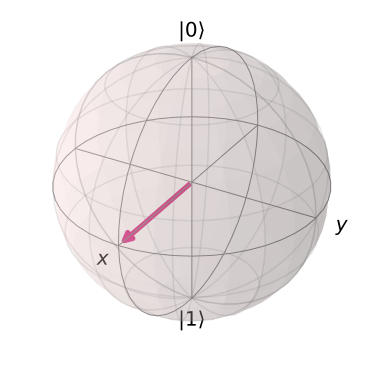

In [19]:
from qiskit_textbook.widgets import plot_bloch_vector_spherical
coords = [pi/2,0,1] # [Theta, Phi, Radius]
plot_bloch_vector_spherical(coords) # 球面座標を持つブロッホベクトル

#### 注意!
量子ビットの状態について初めて学習するとき、量子ビットの _状態ベクトル_ と _ブロッホベクトル_ を混同しやすいです。 状態ベクトルは [1.1](＃notation) で解かれたベクトルであり、量子ビットが存在できる2つの状態の振幅を保持します。ブロッホベクトルは、2次元の複素数の状態ベクトルを実際の3次元空間にマッピングする視覚化ツールです。

#### 練習問題

`plot_bloch_sphere_spherical()`を使って以下の状態の量子ビットをプロットしてください。
1. $|0\rangle$
2. $|1\rangle$
3. $\tfrac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$
4. $\tfrac{1}{\sqrt{2}}(|0\rangle - i|1\rangle)$
5. $\tfrac{1}{\sqrt{2}}\begin{bmatrix}i\\1\end{bmatrix}$

`plot_bloch_vector()`で使用するために、球座標からデカルト座標に変換するウィジェットも以下に含めました。

In [20]:
from qiskit_textbook.widgets import bloch_calc
bloch_calc()

HTML(value='<pre></pre>')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01h\x00\x00\x01h\x08\x06\x00\x00\x00z\xe5a\xd5\x00\…

In [21]:
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.13.0',
 'qiskit-aer': '0.5.1',
 'qiskit-ignis': '0.3.0',
 'qiskit-ibmq-provider': '0.6.1',
 'qiskit-aqua': '0.6.6',
 'qiskit': '0.18.3'}